In [22]:
import pandas as pd
import matplotlib.pyplot as plt

from settings import INTERIM

In [2]:
scoring = pd.read_pickle(INTERIM / 'scoring_multi_index.pkl')
birth_dates = pd.read_pickle(INTERIM / 'birth_dates.pkl')

In [3]:
scoring.columns

Index(['firstName', 'lastName', 'pos', 'tmID', 'GP', 'G', 'A', 'Pts', 'SOG'], dtype='object')

In [4]:
scoring.head()

firstName    lastName pos tmID    GP    G     A   Pts    SOG
playerID  year                                                             
aaltoan01 1997     Antti       Aalto   C  ANA   3.0  0.0   0.0   0.0    1.0
          1998     Antti       Aalto   C  ANA  73.0  3.0   5.0   8.0   61.0
          1999     Antti       Aalto   C  ANA  63.0  7.0  11.0  18.0  102.0
          2000     Antti       Aalto   C  ANA  12.0  1.0   1.0   2.0   18.0
abdelju01 2007    Justin  Abdelkader   L  DET   2.0  0.0   0.0   0.0    6.0

In [5]:
wayne = scoring.loc['gretzwa01']

In [6]:
wayne.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 1980 to 1998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   firstName  20 non-null     object  
 1   lastName   20 non-null     object  
 2   pos        20 non-null     category
 3   tmID       20 non-null     object  
 4   GP         20 non-null     float64 
 5   G          20 non-null     float64 
 6   A          20 non-null     float64 
 7   Pts        20 non-null     float64 
 8   SOG        20 non-null     float64 
dtypes: category(1), float64(5), object(3)
memory usage: 1.5+ KB


In [7]:
wayne.head()

,firstName,lastName,pos,tmID,GP,G,A,Pts,SOG
year,,,,,,,,,
1980,Wayne,Gretzky,C,EDM,80.0,55.0,109.0,164.0,261.0
1981,Wayne,Gretzky,C,EDM,80.0,92.0,120.0,212.0,369.0
1982,Wayne,Gretzky,C,EDM,80.0,71.0,125.0,196.0,348.0
1983,Wayne,Gretzky,C,EDM,74.0,87.0,118.0,205.0,324.0
1984,Wayne,Gretzky,C,EDM,80.0,73.0,135.0,208.0,358.0


In [8]:
sums = wayne.groupby('year')[['G', 'A']].sum()

In [9]:
pd.to_datetime(sums.index, format='%Y')

DatetimeIndex(['1980-01-01', '1981-01-01', '1982-01-01', '1983-01-01',
               '1984-01-01', '1985-01-01', '1986-01-01', '1987-01-01',
               '1988-01-01', '1989-01-01', '1990-01-01', '1991-01-01',
               '1992-01-01', '1993-01-01', '1994-01-01', '1995-01-01',
               '1996-01-01', '1997-01-01', '1998-01-01'],
              dtype='datetime64[ns]', name='year', freq=None)

In [10]:
means = sums.rolling(3)['G'].sum()
means


year
1980      NaN
1981      NaN
1982    218.0
1983    250.0
1984    231.0
1985    212.0
1986    187.0
1987    154.0
1988    156.0
1989    134.0
1990    135.0
1991    112.0
1992     88.0
1993     85.0
1994     65.0
1995     72.0
1996     59.0
1997     71.0
1998     57.0
Name: G, dtype: float64

In [11]:
means = sums.rolling(window=3)['G'].sum()
means

year
1980      NaN
1981      NaN
1982    218.0
1983    250.0
1984    231.0
1985    212.0
1986    187.0
1987    154.0
1988    156.0
1989    134.0
1990    135.0
1991    112.0
1992     88.0
1993     85.0
1994     65.0
1995     72.0
1996     59.0
1997     71.0
1998     57.0
Name: G, dtype: float64

In [12]:
means = sums.rolling(window=3)['G'].sum()
means

year
1980      NaN
1981      NaN
1982    218.0
1983    250.0
1984    231.0
1985    212.0
1986    187.0
1987    154.0
1988    156.0
1989    134.0
1990    135.0
1991    112.0
1992     88.0
1993     85.0
1994     65.0
1995     72.0
1996     59.0
1997     71.0
1998     57.0
Name: G, dtype: float64

In [13]:
sums.rolling(3).mean()

,G,A
year,,
1980,NaN,NaN
1981,NaN,NaN
1982,72.666667,118.000000
1983,83.333333,121.000000
1984,77.000000,126.000000
1985,70.666667,138.666667
1986,62.333333,139.666667
1987,51.333333,131.000000
1988,52.000000,114.666667


In [14]:
sums.rolling(3, min_periods=2).mean()

,G,A
year,,
1980,NaN,NaN
1981,73.500000,114.500000
1982,72.666667,118.000000
1983,83.333333,121.000000
1984,77.000000,126.000000
1985,70.666667,138.666667
1986,62.333333,139.666667
1987,51.333333,131.000000
1988,52.000000,114.666667


In [15]:
sums.rolling(3, min_periods=1).mean()

,G,A
year,,
1980,55.000000,109.000000
1981,73.500000,114.500000
1982,72.666667,118.000000
1983,83.333333,121.000000
1984,77.000000,126.000000
1985,70.666667,138.666667
1986,62.333333,139.666667
1987,51.333333,131.000000
1988,52.000000,114.666667


In [16]:
sums.rolling(3, center=True).mean()

,G,A
year,,
1980,NaN,NaN
1981,72.666667,118.000000
1982,83.333333,121.000000
1983,77.000000,126.000000
1984,70.666667,138.666667
1985,62.333333,139.666667
1986,51.333333,131.000000
1987,52.000000,114.666667
1988,44.666667,108.333333


In [18]:
sums.rolling(3, min_periods=1,center=True).sum()

,G,A
year,,
1980,147.0,229.0
1981,218.0,354.0
1982,250.0,363.0
1983,231.0,378.0
1984,212.0,416.0
1985,187.0,419.0
1986,154.0,393.0
1987,156.0,344.0
1988,134.0,325.0


In [19]:
sums['G'].rolling(3,center=True, win_type='triang' ).sum()

year
1980      NaN
1981    155.0
1982    160.5
1983    159.0
1984    142.5
1985    119.5
1986    108.0
1987     98.0
1988     94.0
1989     87.5
1990     76.5
1991     59.5
1992     50.5
1993     51.5
1994     41.5
1995     41.0
1996     48.0
1997     40.0
1998      NaN
Name: G, dtype: float64

In [20]:
sums.cumsum()

,G,A
year,,
1980,55.0,109.0
1981,147.0,229.0
1982,218.0,354.0
1983,305.0,472.0
1984,378.0,607.0
1985,430.0,770.0
1986,492.0,891.0
1987,532.0,1000.0
1988,586.0,1114.0


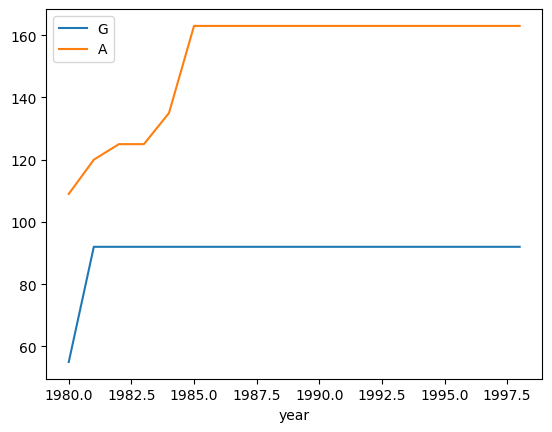

In [23]:
sums.cummax().plot()
plt.show()

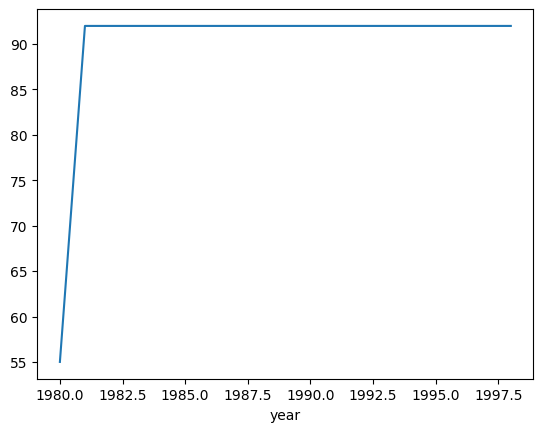

In [26]:
sums['G'].expanding().max().plot()
plt.show()

In [31]:
totals = sums.sum()
totals

G     843.0
A    1877.0
dtype: float64

In [32]:
sums['G'].expanding().agg(['sum', 'mean'])

,sum,mean
year,,
1980,55.0,55.000000
1981,147.0,73.500000
1982,218.0,72.666667
1983,305.0,76.250000
1984,378.0,75.600000
1985,430.0,71.666667
1986,492.0,70.285714
1987,532.0,66.500000
1988,586.0,65.111111


In [35]:
sums['G'].expanding().aggregate(lambda x: x.sum() / totals['G'])

year
1980    0.065243
1981    0.174377
1982    0.258600
1983    0.361803
1984    0.448399
1985    0.510083
1986    0.583630
1987    0.631079
1988    0.695136
1989    0.742586
1990    0.791222
1991    0.827995
1992    0.846975
1993    0.892052
1994    0.905101
1995    0.932384
1996    0.962040
1997    0.989324
1998    1.000000
Name: G, dtype: float64

<Axes: xlabel='year'>

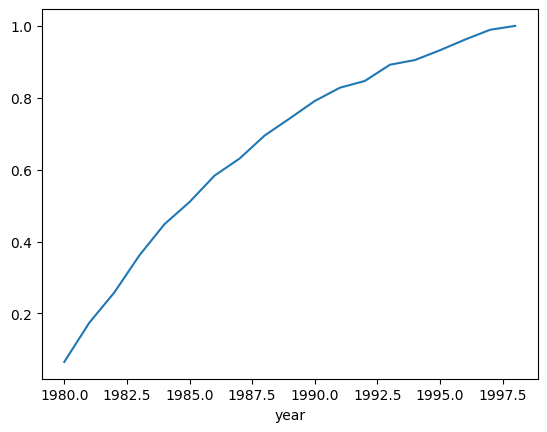

In [36]:
sums['G'].expanding().aggregate(lambda x: x.sum() / totals['G']).plot()

In [39]:
pd.Series([10, 20, 60, 100]).expanding().sum()

0     10.0
1     30.0
2     90.0
3    190.0
dtype: float64

In [40]:
pd.Series([10, 20, 60, 100]).cumsum()

0     10
1     30
2     90
3    190
dtype: int64